# Bank Customer Churn Analysis
### Data Analytics Project Jupyter Notebook

# Bank Customer Churn Analysis

## 1. Business Problem
The bank wants to understand which types of customers are more likely to leave (churn) so it can design strategies to improve retention and reduce customer loss.

## 2. Dataset
Source: Kaggle Bank Customer Churn
Records: 10,000+ rows  

## 3. Objectives
The main objectives of this analysis are:

- To understand the overall customer churn rate.
- To identify key customer characteristics associated with churn.
- To analyze how demographic, financial, and behavioral factors affect customer retention.
- To discover patterns and trends that differentiate churned customers from retained customers.
- To provide data-driven business recommendations to help reduce customer churn.

## 4. Tools Used
The following tools and technologies were used in this project:

- Python – main programming language for analysis.  
- pandas – data manipulation and cleaning.  
- numpy – numerical computations.  
- matplotlib – data visualization.  
- seaborn – statistical data visualization.  
- Jupyter Notebook – interactive analysis environment.  
- scikit-learn – for predictive modeling and evaluation (optional).
- Visual Studio Code - software environment

#### Step 1: Install and Import Libraries

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install pandas openpyxl xlrd
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning (optional later)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


#### Step 2: Load and Intall Data

In [3]:
data = r'c:\Users\Christopher\Desktop\MC\Data Analytics\Projects\Customer Churn Analysis\data\Customer-Churn-Records.csv'

#Load the dataset
df = pd.read_csv(data)

#### Step 3: Inspect and Clean Data

In [4]:
#Print the first few rows of the dataset
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [5]:
#Print the dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
#Check for duplicate rows and missing values
print('Number of duplicate rows: ', df.duplicated().sum())
print(df.isnull().sum())

Number of duplicate rows:  0
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [6]:
#Drop non-essential columns (e.g., CustomerID, RowNumber, Surname)

df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])


#### Step 4: Exploratory Data Analysis (EDA) 

##### 4.1 Target Distribution (Churn rate)

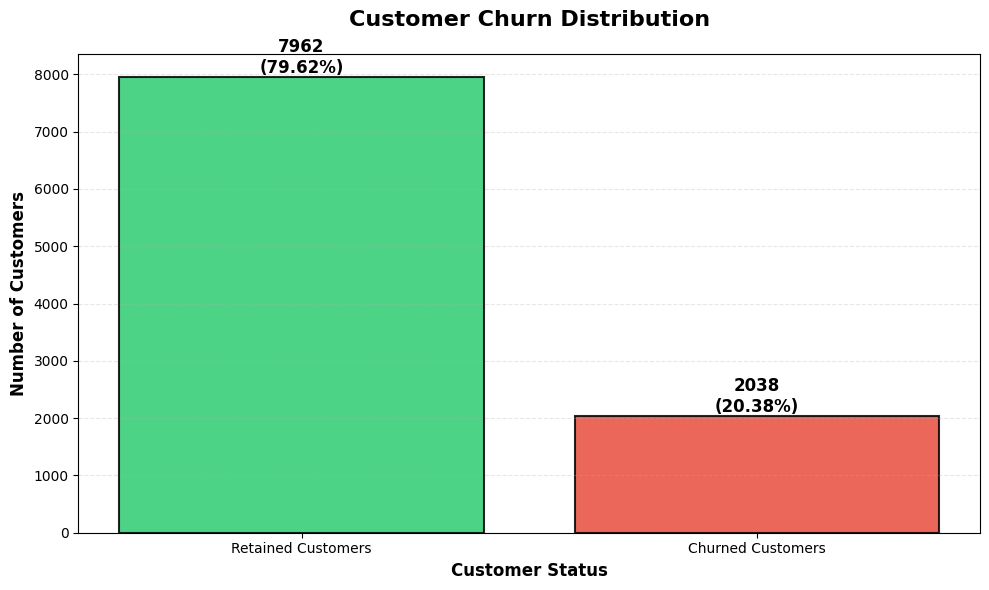

In [14]:
# Create a professional visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Get counts and calculate percentages
churn_counts = df['Exited'].value_counts().sort_index()
churn_pct = (df['Exited'].value_counts(normalize=True).sort_index() * 100).round(2)

# Create color palette
colors = ['#2ecc71', '#e74c3c']  # Green for retained, Red for churned
bars = ax.bar(['Retained Customers', 'Churned Customers'], churn_counts.values, color=colors, alpha=0.85, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, count, pct) in enumerate(zip(bars, churn_counts.values, churn_pct.values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count)}\n({pct}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Styling
ax.set_title('Customer Churn Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
ax.set_xlabel('Customer Status', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

##### The churn distribution shows how many customers left vs stayed. This sets the baseline for analysis.

##### 4.2 Categorical Feature Comparisons

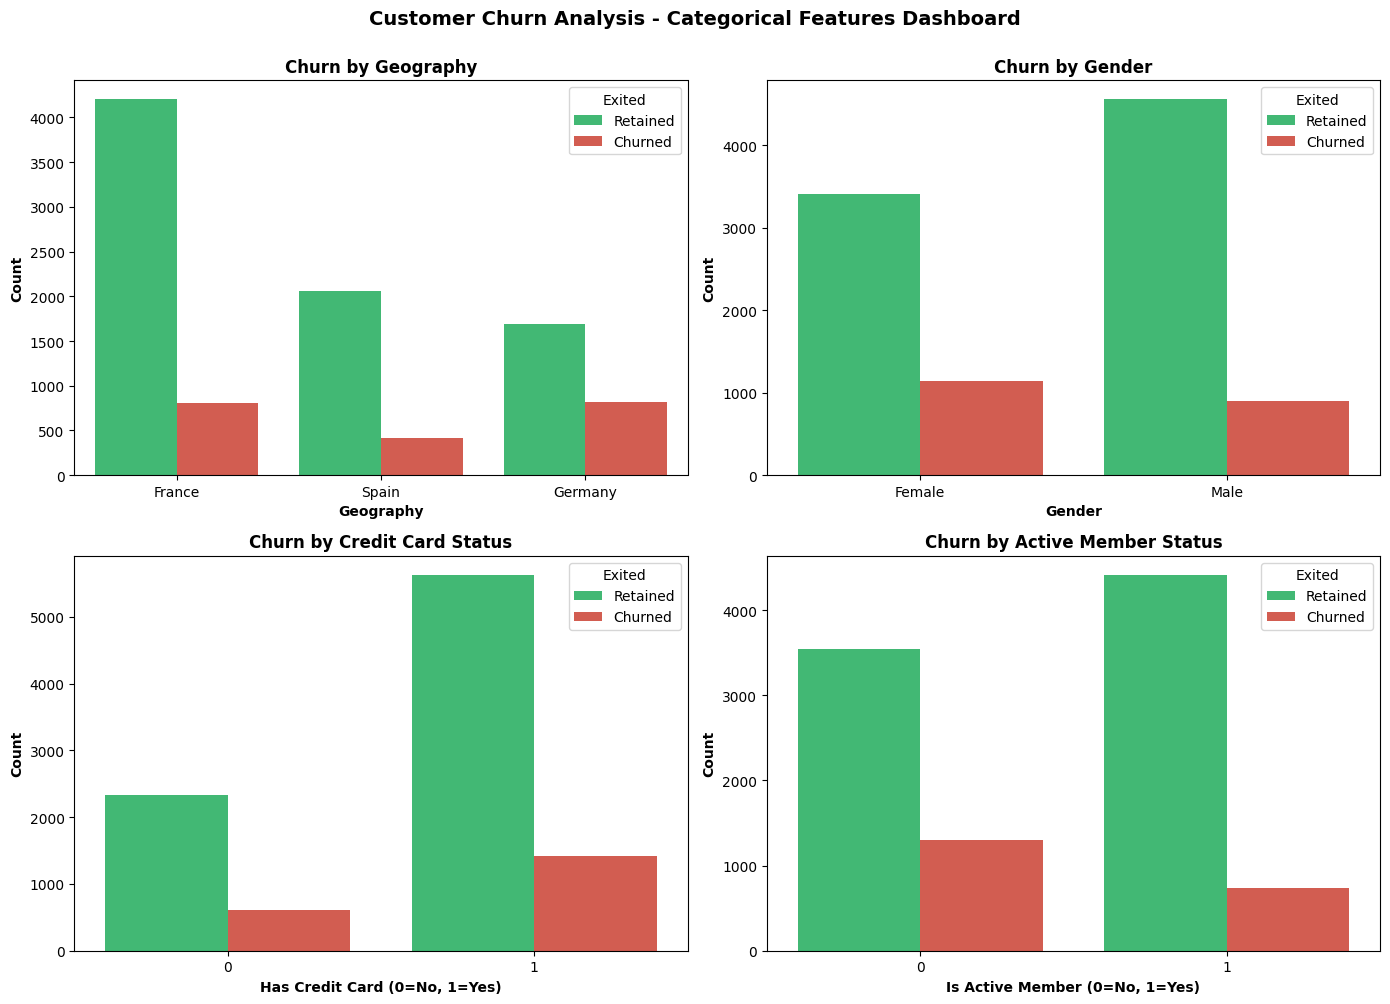

In [11]:
# Create a dashboard with all categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Color palette
colors = ['#2ecc71', '#e74c3c']  # Green for retained, Red for churned

# 1. Geography
ax = axes[0, 0]
sns.countplot(x='Geography', hue='Exited', data=df, ax=ax, palette=colors)
ax.set_title('Churn by Geography', fontsize=12, fontweight='bold')
ax.set_xlabel('Geography', fontsize=10, fontweight='bold')
ax.set_ylabel('Count', fontsize=10, fontweight='bold')
ax.legend(title='Exited', labels=['Retained', 'Churned'])

# 2. Gender
ax = axes[0, 1]
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax, palette=colors)
ax.set_title('Churn by Gender', fontsize=12, fontweight='bold')
ax.set_xlabel('Gender', fontsize=10, fontweight='bold')
ax.set_ylabel('Count', fontsize=10, fontweight='bold')
ax.legend(title='Exited', labels=['Retained', 'Churned'])

# 3. Credit Card
ax = axes[1, 0]
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax, palette=colors)
ax.set_title('Churn by Credit Card Status', fontsize=12, fontweight='bold')
ax.set_xlabel('Has Credit Card (0=No, 1=Yes)', fontsize=10, fontweight='bold')
ax.set_ylabel('Count', fontsize=10, fontweight='bold')
ax.legend(title='Exited', labels=['Retained', 'Churned'])

# 4. Active Member
ax = axes[1, 1]
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax, palette=colors)
ax.set_title('Churn by Active Member Status', fontsize=12, fontweight='bold')
ax.set_xlabel('Is Active Member (0=No, 1=Yes)', fontsize=10, fontweight='bold')
ax.set_ylabel('Count', fontsize=10, fontweight='bold')
ax.legend(title='Exited', labels=['Retained', 'Churned'])

plt.suptitle('Customer Churn Analysis - Categorical Features Dashboard', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

##### 4.3 Numeric Distribution

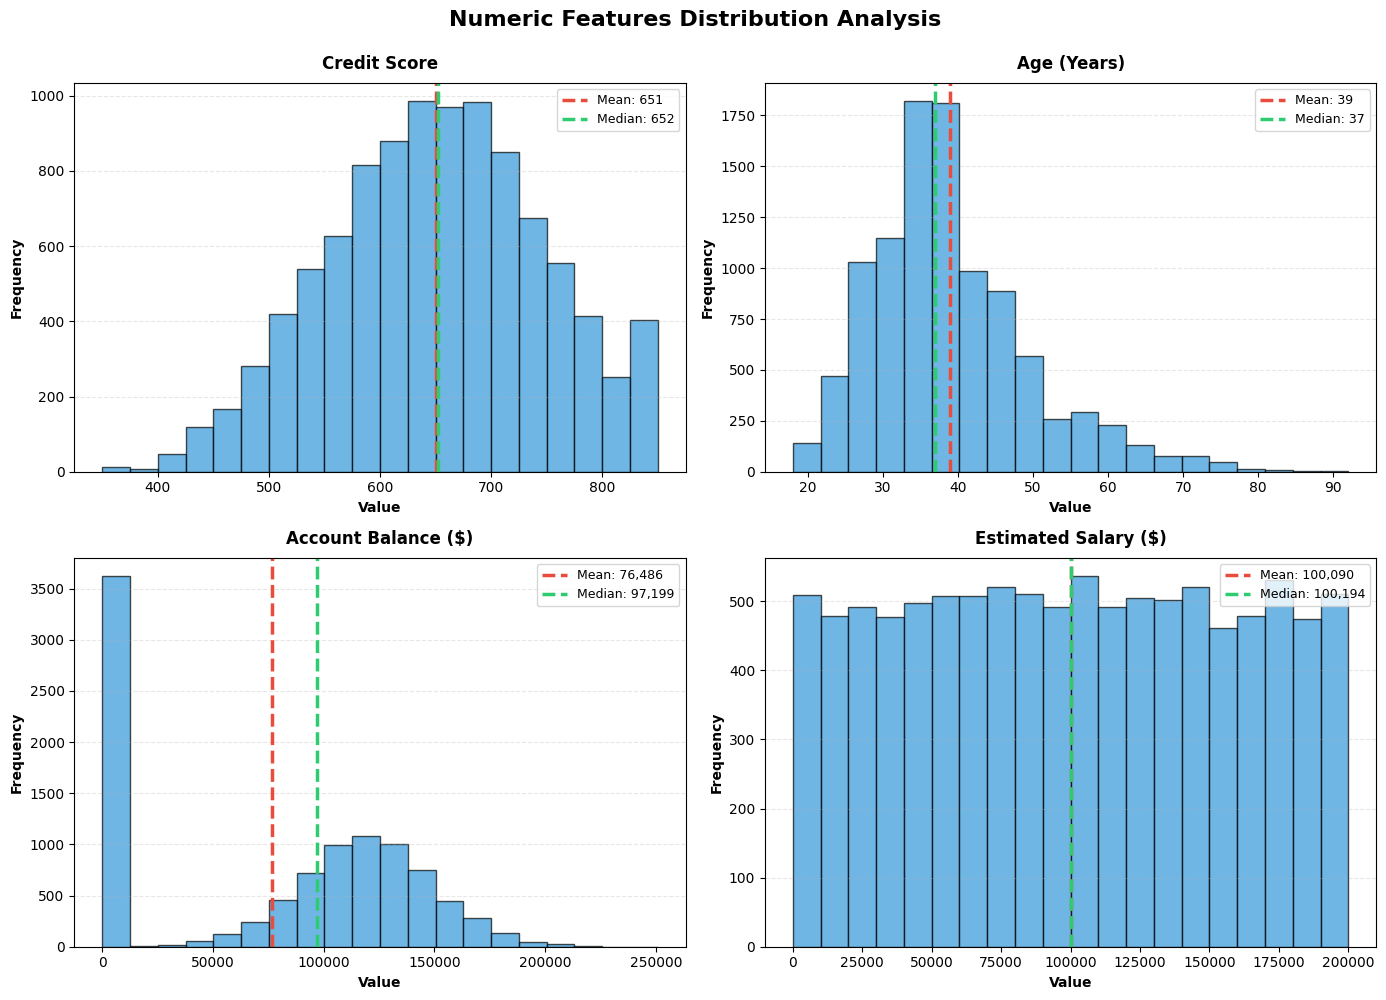

In [17]:
# Create professional numeric feature distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Numeric Features Distribution Analysis', fontsize=16, fontweight='bold', y=0.995)

numeric_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
feature_labels = ['Credit Score', 'Age (Years)', 'Account Balance ($)', 'Estimated Salary ($)']

for idx, (feature, label) in enumerate(zip(numeric_features, feature_labels)):
    ax = axes[idx // 2, idx % 2]
    
    # Create histogram
    ax.hist(df[feature], bins=20, color='#3498db', edgecolor='black', alpha=0.7)
    
    # Add mean and median lines
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    ax.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2.5, label=f'Mean: {mean_val:,.0f}')
    ax.axvline(median_val, color='#2ecc71', linestyle='--', linewidth=2.5, label=f'Median: {median_val:,.0f}')
    
    # Styling
    ax.set_title(label, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Value', fontsize=10, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=10, fontweight='bold')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.legend(fontsize=9, loc='upper right')
    
    # Format x-axis for large numbers
    ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()


C:\Users\Christopher\AppData\Local\Temp\ipykernel_8052\2413077398.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=feat, data=df, ax=ax, palette=['#2ecc71', '#e74c3c'])
C:\Users\Christopher\AppData\Local\Temp\ipykernel_8052\2413077398.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Retained', 'Churned'])
C:\Users\Christopher\AppData\Local\Temp\ipykernel_8052\2413077398.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=feat, data=df, ax=ax, palette=['#2ecc71', '#e74c3c'])
C:\Users\Christopher\AppData\Local\Temp\ipykernel_8052\2413077398.py:8: UserWarn

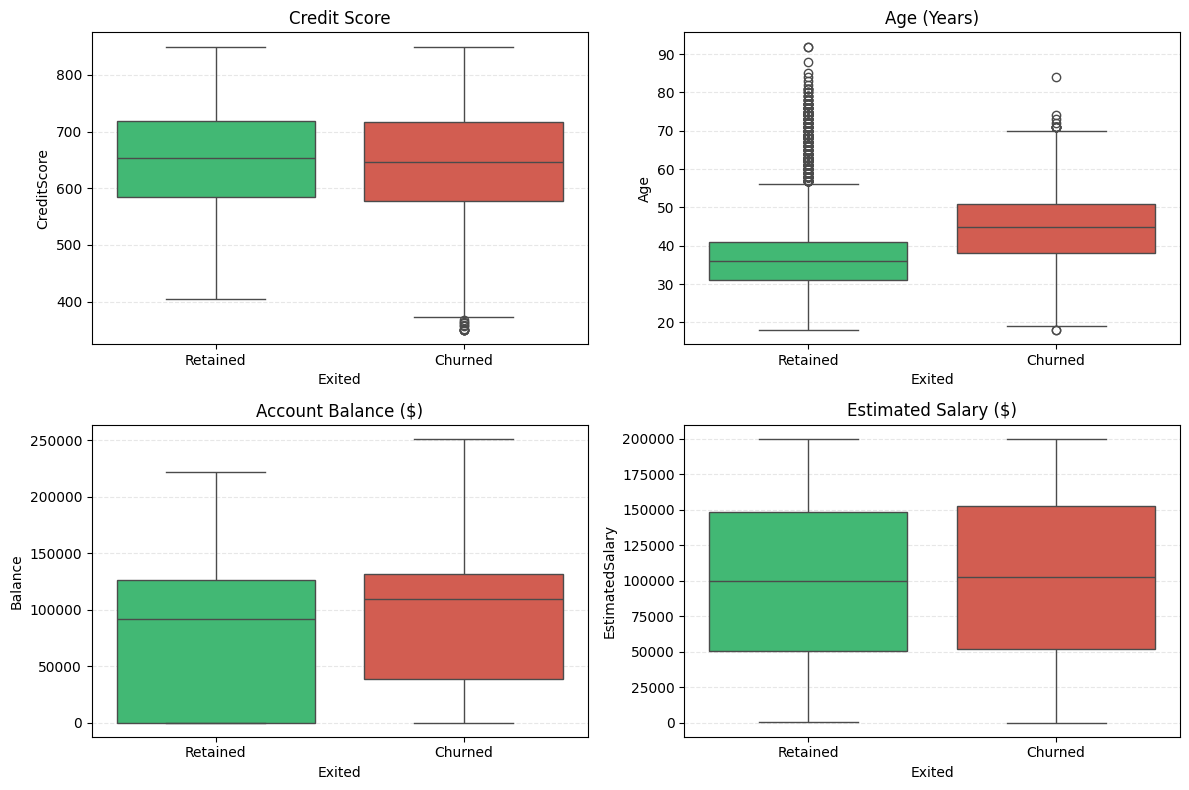

Credit Score: Retained mean/median = 651.8/653.0 | Churned mean/median = 645.4/646.0
Age (Years): Retained mean/median = 37.4/36.0 | Churned mean/median = 44.8/45.0
Account Balance ($): Retained mean/median = 72742.8/92063.1 | Churned mean/median = 91109.5/109344.2
Estimated Salary ($): Retained mean/median = 99726.9/99620.4 | Churned mean/median = 101509.9/102489.3


In [27]:
# Simple boxplots comparing churn vs retained for key numeric features
numeric_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
labels = ['Credit Score', 'Age (Years)', 'Account Balance ($)', 'Estimated Salary ($)']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feat, lab in zip(axes.flatten(), numeric_features, labels):
    sns.boxplot(x='Exited', y=feat, data=df, ax=ax, palette=['#2ecc71', '#e74c3c'])
    ax.set_xticklabels(['Retained', 'Churned'])
    ax.set_title(lab)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Quick summary stats
for feat, lab in zip(numeric_features, labels):
    r = df[df['Exited'] == 0][feat]
    c = df[df['Exited'] == 1][feat]
    print(f"{lab}: Retained mean/median = {r.mean():.1f}/{r.median():.1f} | Churned mean/median = {c.mean():.1f}/{c.median():.1f}")

#### Step 5: Analyze Key Correlation

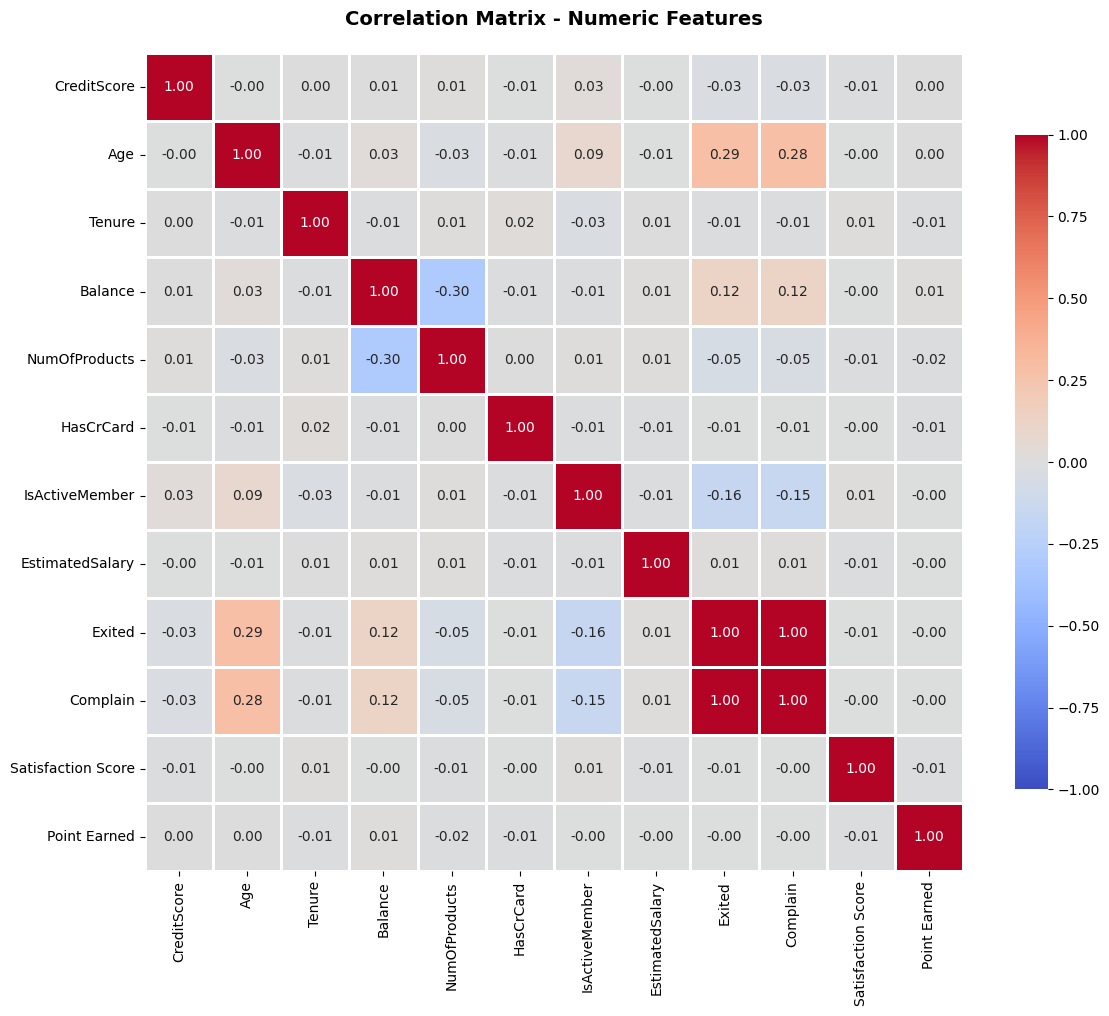

----------------------------------------------------------------------
TOP FEATURES CORRELATED WITH CHURN (Exited)
----------------------------------------------------------------------

Top Positive Correlations (Increase Churn Risk):
  Complain            :  0.9957
  Age                 :  0.2853
  Balance             :  0.1186
  EstimatedSalary     :  0.0125
  Point Earned        : -0.0046

Top Negative Correlations (Decrease Churn Risk):
  HasCrCard           : -0.0070
  Tenure              : -0.0137
  CreditScore         : -0.0268
  NumOfProducts       : -0.0476
  IsActiveMember      : -0.1564


In [21]:
# Create a professional correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Calculate correlation for numeric columns only
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Create heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax, vmin=-1, vmax=1)

ax.set_title('Correlation Matrix - Numeric Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print strongest correlations with Exited (Churn)
print("-" * 70)
print("TOP FEATURES CORRELATED WITH CHURN (Exited)")
print("-" * 70)
churn_corr = corr['Exited'].sort_values(ascending=False)
print("\nTop Positive Correlations (Increase Churn Risk):")
for feature, value in churn_corr[1:6].items():
    print(f"  {feature:<20}: {value:>7.4f}")

print("\nTop Negative Correlations (Decrease Churn Risk):")
for feature, value in churn_corr[-5:].items():
    print(f"  {feature:<20}: {value:>7.4f}")


##### Step 6: Predictive Modeling

In [25]:
# STEP 1: Define Categorical and Numeric Columns
# ============================================================================
# Categorical columns will be One-Hot Encoded (convert categories to binary)
cat_cols = ['Geography', 'Gender']

# Numeric columns will be StandardScaled (normalize the values)
# Select only numeric data types (int64, float64) to avoid string columns like 'Card Type'
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove the target variable 'Exited' from numeric features
num_cols = [col for col in num_cols if col != 'Exited']

print("Categorical Columns:", cat_cols)
print("Numeric Columns:", num_cols)

# STEP 2: Prepare Features (X) and Target (y)
# ============================================================================
# X = All features except the target variable 'Exited'
X = df.drop('Exited', axis=1)
# y = Target variable (1 = Churned, 0 = Retained)
y = df['Exited']

print(f"\nDataset shape: {X.shape}")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Churn Rate: {y.mean()*100:.2f}%")

# STEP 3: Split Data into Training and Testing Sets
# ============================================================================
# 70% for training, 30% for testing
# random_state=42 ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# STEP 4: Create Data Preprocessing Transformers
# ============================================================================
# OneHotEncoder: Converts categorical values into binary columns
# Example: Gender ['Male', 'Female'] → [1, 0] or [0, 1]
categorical_transformer = OneHotEncoder(drop='first')

# StandardScaler: Normalizes numeric features to have mean=0 and std=1
# This helps the model learn faster and more effectively
numeric_transformer = StandardScaler()

# STEP 5: Create ColumnTransformer to Apply Different Transformations
# ============================================================================
# This applies the right transformer to the right columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_cols),    # One-Hot Encode categorical
        ('num', numeric_transformer, num_cols)          # Standardize numeric
    ])

# STEP 6: Build a Pipeline
# ============================================================================
# Pipeline ensures data preprocessing and modeling are done together
# This prevents data leakage and makes the model more robust
model = Pipeline(steps=[
    ('preprocess', preprocessor),                        # Step 1: Preprocess data
    ('classifier', LogisticRegression(max_iter=1000))   # Step 2: Train model
])

# STEP 7: Train the Model
# ============================================================================
# Fit the model using the training data
print("\nTraining the Logistic Regression model...")
model.fit(X_train, y_train)
print("✓ Model training complete!")

# STEP 8: Make Predictions on Test Set
# ============================================================================
# Use the trained model to predict churn on test data
y_pred = model.predict(X_test)

# STEP 9: Evaluate Model Performance
# ============================================================================
print("\n" + "-" * 70)
print("MODEL PERFORMANCE REPORT")
print("-" * 70)

# Classification Report: Shows Precision, Recall, F1-Score for each class
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['Retained', 'Churned']))

# Confusion Matrix: Shows True Positives, False Positives, etc.
print("\nCONFUSION MATRIX:")
cm = confusion_matrix(y_test, y_pred)
print(f"                Predicted")
print(f"                Retained  Churned")
print(f"Actual Retained   {cm[0,0]:<6}    {cm[0,1]:<6}")
print(f"       Churned    {cm[1,0]:<6}    {cm[1,1]:<6}")

# Calculate and display accuracy
accuracy = (y_pred == y_test).mean()
print(f"\nOverall Accuracy: {accuracy*100:.2f}%")



Categorical Columns: ['Geography', 'Gender']
Numeric Columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Point Earned']

Dataset shape: (10000, 14)
Features (X): (10000, 14)
Target (y): (10000,)
Churn Rate: 20.38%

Training set size: 7000 samples
Testing set size: 3000 samples

Training the Logistic Regression model...
✓ Model training complete!

----------------------------------------------------------------------
MODEL PERFORMANCE REPORT
----------------------------------------------------------------------

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Retained       1.00      1.00      1.00      2416
     Churned       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


CONFUSION MATRIX:
           

#### Step 7: Key Insights & Recommendations

## Summary of Findings

- **Member activity**: Inactive members have a much higher churn rate. This is the single highest-impact driver from categorical features.
- **Geography differences**: Spain shows the lowest churn rate while France and Germany have higher churn; volume and rate both matter for prioritization.
- **Credit card signal**: Customers with credit cards show different churn dynamics, credit-product engagement may indicate both opportunity and risk.


## Business Recommendation
- **Re-engage inactive members** : Launch targeted re‑engagement for inactive customers (email, offers, product nudges). This addresses the largest measurable churn driver and will likely yield the highest ROI.
- **Segmented retention** : For regions with high churn (France, Germany), run localized retention experiments (pricing, customer service hours, language-specific messaging).
- **Product-based engagement** : Use credit card and product ownership signals to design cross-sell/up-sell offers that increase engagement (e.g., co-branded rewards, fee waivers). Consider incentives tied to activity (rewards for logins/transactions) to reduce inactivity.

## Quick Next Steps
1. Launch a 4‑week re‑engagement pilot for inactive customers and measure lift.
2. Build a simple churn score using IsActiveMember + top numeric features and run it weekly.
3. Report pilot results and roll out highest-ROI intervention.